# To predict the cat price using Machine Learning Model
https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('DataSet/Car DS/car details v3.csv')
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
data['name'].count()

8128

In [4]:
data.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [5]:
data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [6]:
data[data['mileage'].isnull()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
78,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
87,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
119,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7846,Toyota Qualis Fleet A3,2000,200000,100000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
7996,Hyundai Santro LS zipPlus,2000,140000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
8009,Hyundai Santro Xing XS eRLX Euro III,2006,145000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
8068,Ford Figo Aspire Facelift,2017,580000,165000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN


In [7]:
data['name'].nunique()

2058

In [8]:
data.drop(labels='name',axis=1,inplace=True)

In [9]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [10]:
data.fuel.unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [11]:
dict = {'Diesel':1,'Petrol': 2 , 'LPG' : 3, 'CNG':4}

In [12]:
data.fuel = data.fuel.map(dict)

In [13]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,2014,450000,145500,1,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,2014,370000,120000,1,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,2006,158000,140000,2,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,2010,225000,127000,1,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,2007,130000,120000,2,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [14]:
data.seller_type.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [15]:
dict1 = {'Individual':1,'Dealer': 2 , 'Trustmark Dealer': 3}

In [16]:
data['seller_type'] = data.seller_type.map(dict1)

In [17]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,2014,450000,145500,1,1,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,2014,370000,120000,1,1,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,2006,158000,140000,2,1,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,2010,225000,127000,1,1,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,2007,130000,120000,2,1,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [18]:
data.transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [19]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

In [20]:
transmission_hot = encoder.fit_transform(data[['transmission']])

In [21]:
transmission_hot.toarray()[:,0]

array([0., 0., 0., ..., 0., 0., 0.])

In [22]:
data.transmission = transmission_hot.toarray()[:,0]

In [23]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,2014,450000,145500,1,1,0.0,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,2014,370000,120000,1,1,0.0,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,2006,158000,140000,2,1,0.0,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,2010,225000,127000,1,1,0.0,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,2007,130000,120000,2,1,0.0,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [24]:
data.owner.unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [25]:
from sklearn.preprocessing import OrdinalEncoder
ordinalEncoder = OrdinalEncoder()
encoded = ordinalEncoder.fit_transform(data[['owner']])

In [26]:
data['owner']= encoded

In [27]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,2014,450000,145500,1,1,0.0,0.0,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,2014,370000,120000,1,1,0.0,2.0,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,2006,158000,140000,2,1,0.0,4.0,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,2010,225000,127000,1,1,0.0,0.0,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,2007,130000,120000,2,1,0.0,0.0,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [28]:
data.mileage = data.mileage.str.replace('kmpl','')
data.mileage = data.mileage.str.replace('km/kg','')

In [29]:
data.engine = data.engine.str.replace('CC','')

In [30]:
data.max_power = data.max_power.str.replace(' bhp', '')

In [31]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,2014,450000,145500,1,1,0.0,0.0,23.4,1248,74,190Nm@ 2000rpm,5.0
1,2014,370000,120000,1,1,0.0,2.0,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0
2,2006,158000,140000,2,1,0.0,4.0,17.7,1497,78,"12.7@ 2,700(kgm@ rpm)",5.0
3,2010,225000,127000,1,1,0.0,0.0,23.0,1396,90,22.4 kgm at 1750-2750rpm,5.0
4,2007,130000,120000,2,1,0.0,0.0,16.1,1298,88.2,"11.5@ 4,500(kgm@ rpm)",5.0


In [32]:
data.torque = data.torque.str.extract('(^\d*)')

In [33]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,2014,450000,145500,1,1,0.0,0.0,23.4,1248,74,190,5.0
1,2014,370000,120000,1,1,0.0,2.0,21.14,1498,103.52,250,5.0
2,2006,158000,140000,2,1,0.0,4.0,17.7,1497,78,12,5.0
3,2010,225000,127000,1,1,0.0,0.0,23.0,1396,90,22,5.0
4,2007,130000,120000,2,1,0.0,0.0,16.1,1298,88.2,11,5.0


In [34]:
data.dtypes

year               int64
selling_price      int64
km_driven          int64
fuel               int64
seller_type        int64
transmission     float64
owner            float64
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [35]:
data.max_power.replace(r'^\s*$', np.NaN, regex=True,inplace=True)

In [36]:
data.mileage = data.mileage.astype(float)
data.engine = data.engine.astype(float)
data.max_power = data.max_power.astype(float)
data.torque = data.torque.astype(float)

In [37]:
data.dtypes

year               int64
selling_price      int64
km_driven          int64
fuel               int64
seller_type        int64
transmission     float64
owner            float64
mileage          float64
engine           float64
max_power        float64
torque           float64
seats            float64
dtype: object

In [38]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()

In [39]:
data.isnull().sum()

year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        216
torque           222
seats            221
dtype: int64

In [40]:
data_imputed = imputer.fit_transform(data)
data_imputed.shape

(8128, 12)

In [41]:
data_imputed

array([[2.0140e+03, 4.5000e+05, 1.4550e+05, ..., 7.4000e+01, 1.9000e+02,
        5.0000e+00],
       [2.0140e+03, 3.7000e+05, 1.2000e+05, ..., 1.0352e+02, 2.5000e+02,
        5.0000e+00],
       [2.0060e+03, 1.5800e+05, 1.4000e+05, ..., 7.8000e+01, 1.2000e+01,
        5.0000e+00],
       ...,
       [2.0090e+03, 3.8200e+05, 1.2000e+05, ..., 7.3900e+01, 1.9000e+02,
        5.0000e+00],
       [2.0130e+03, 2.9000e+05, 2.5000e+04, ..., 7.0000e+01, 1.4000e+02,
        5.0000e+00],
       [2.0130e+03, 2.9000e+05, 2.5000e+04, ..., 7.0000e+01, 1.4000e+02,
        5.0000e+00]])

In [42]:
array_sum = np.sum(data_imputed)
array_has_nan = np.isnan(array_sum)
print(array_has_nan)

False


In [43]:
y = data_imputed[:,1]
data_imputed.shape

(8128, 12)

In [44]:
X = np.delete(data_imputed,[1],axis=1)
print(X)

[[2.0140e+03 1.4550e+05 1.0000e+00 ... 7.4000e+01 1.9000e+02 5.0000e+00]
 [2.0140e+03 1.2000e+05 1.0000e+00 ... 1.0352e+02 2.5000e+02 5.0000e+00]
 [2.0060e+03 1.4000e+05 2.0000e+00 ... 7.8000e+01 1.2000e+01 5.0000e+00]
 ...
 [2.0090e+03 1.2000e+05 1.0000e+00 ... 7.3900e+01 1.9000e+02 5.0000e+00]
 [2.0130e+03 2.5000e+04 1.0000e+00 ... 7.0000e+01 1.4000e+02 5.0000e+00]
 [2.0130e+03 2.5000e+04 1.0000e+00 ... 7.0000e+01 1.4000e+02 5.0000e+00]]


In [45]:
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)

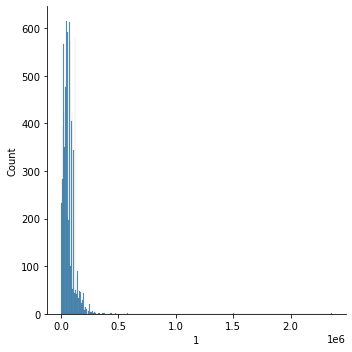

In [46]:
sns.displot(data= X_df,x=1)

<Figure size 1440x2160 with 0 Axes>

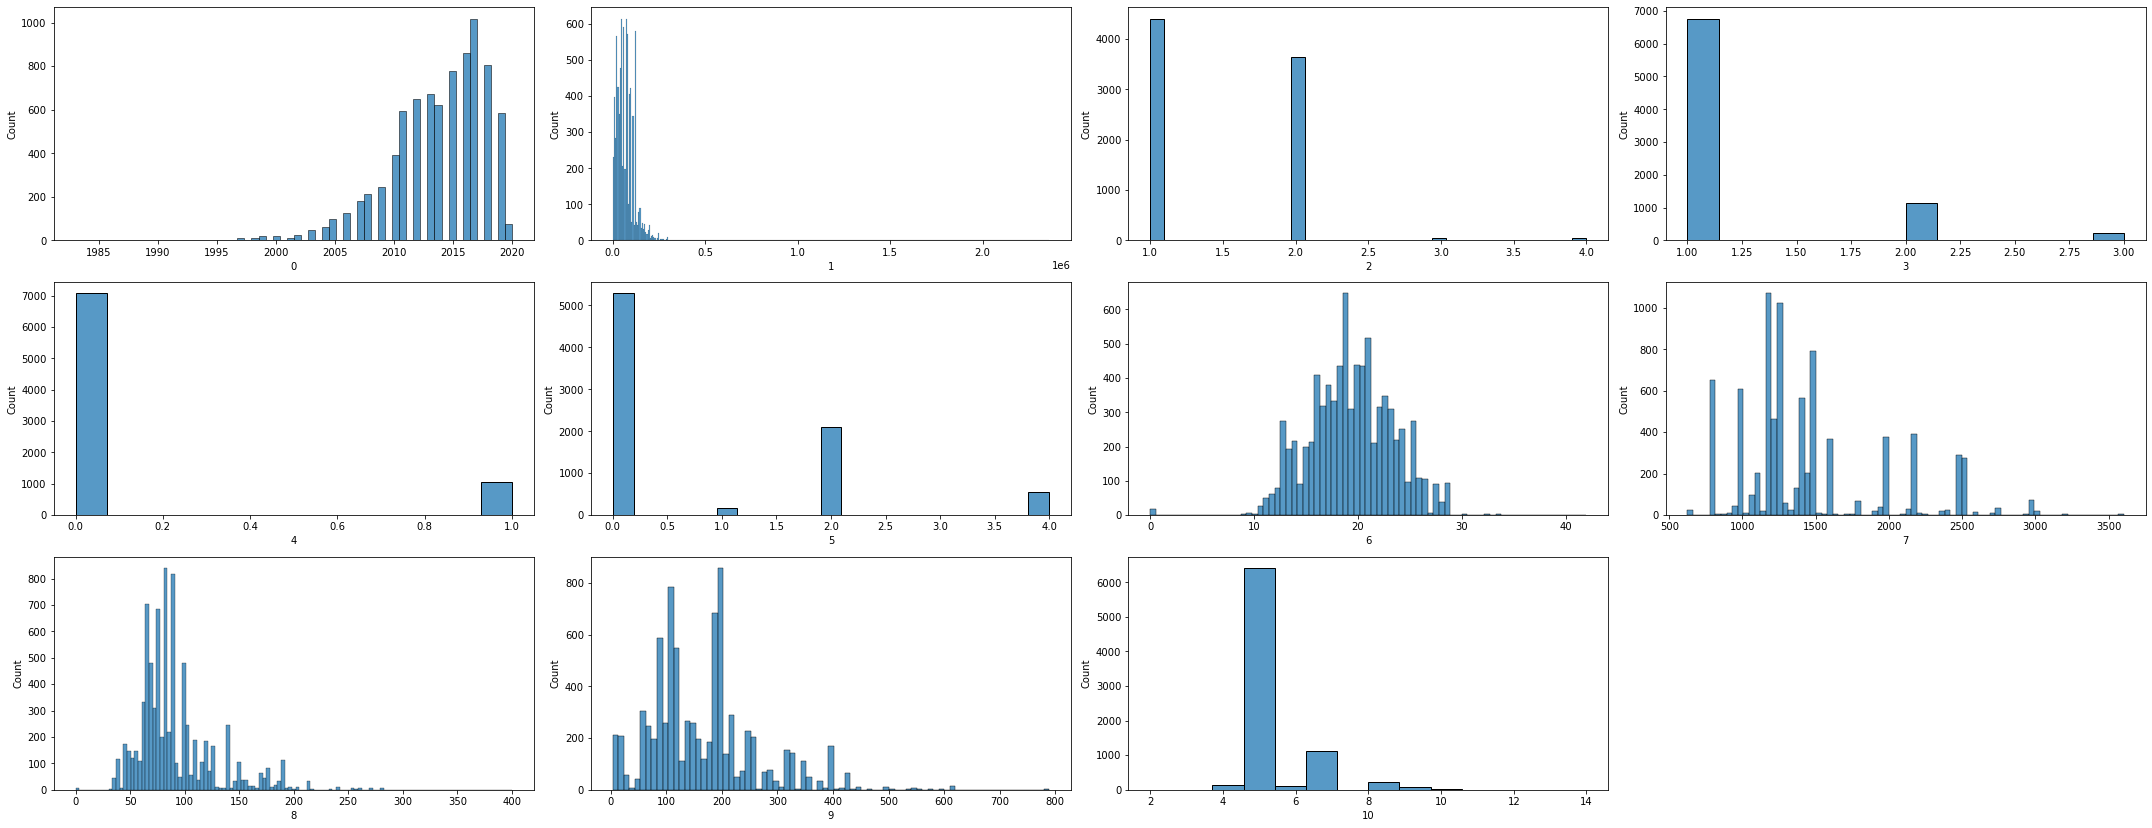

In [47]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,30), facecolor='white')
plotnumber =1
fig, axes = plt.subplots(ncols=len(X_df.columns), figsize=(30,15))
for ax, col in zip(axes, X_df.columns):
    ax = plt.subplot(4,4,plotnumber)
    sns.histplot(X_df[col], ax=ax)
    plotnumber+=1
plt.tight_layout() 
plt.show()

In [48]:
#To check multicolineraity
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
print(vif)


           VIF
0   248.185903
1     3.243959
2    18.924050
3     9.209599
4     1.895799
5     1.698975
6    50.838771
7    47.248641
8    35.594115
9    15.506581
10   70.596503


In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [51]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [52]:
from sklearn.linear_model import LinearRegression
linearRegModel = LinearRegression()

In [53]:
linearRegModel.fit(X_scaled,y_train)

LinearRegression()

In [54]:
import pickle
modelname = 'LinearReg.pickle'
scalername = 'LinearScaler.pickle'
pickle.dump(linearRegModel,open(modelname, 'wb'))
pickle.dump(scaler,open(scalername,'wb'))

In [55]:
# prediction using the saved model
loaded_model = pickle.load(open(modelname, 'rb'))
scaler = pickle.load(open(scalername, 'rb'))
X_test_scaled = scaler.transform(X_test)
y_pred = loaded_model.predict(X_test_scaled)

In [56]:
from sklearn.metrics import r2_score

In [57]:
r2_score(y_test,y_pred)

0.6727835850732036

In [58]:
loaded_model.score(X_scaled,y_train)

0.6687250162875473

In [59]:
loaded_model.score(X_test_scaled,y_test)

0.6727835850732036

In [60]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y,model):
    r2 = model.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [61]:
adj_r2(X_test_scaled,y_test,loaded_model)

0.671436007175714

In [62]:
from sklearn.preprocessing import PolynomialFeatures

In [63]:
poly_reg = PolynomialFeatures(degree = 2,interaction_only=True)
X_poly = poly_reg.fit_transform(X_scaled)
X_poly.shape

(5445, 67)

In [64]:
linearRegModel.fit(X_poly,y_train)
X_poly_test_scaled = poly_reg.transform(X_test_scaled)
#print(X_poly_test_scaled)
poly_pred = linearRegModel.predict(X_poly_test_scaled)
print(r2_score(y_test,poly_pred))
print(adj_r2(X_poly_test_scaled,y_test,linearRegModel))

0.9061348426918265
0.9037298845504699


In [65]:
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV

In [66]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10)
ridgecv.fit(X_scaled, y_train)

RidgeCV(alphas=array([0.7694741 , 4.54349746, 7.89125156, 1.64258408, 8.73447587,
       7.60409291, 2.86763789, 3.09406294, 2.45632342, 6.82892858,
       4.10008751, 8.38703503, 5.58527858, 1.31453901, 9.22639104,
       7.35047696, 7.63990054, 1.91922092, 4.06871654, 4.67146679,
       8.04376669, 3.33938802, 7.89663757, 5.08052565, 4.25457797,
       4.32874881, 1.98493693, 2.34421664, 5.39444961, 6.09896651,
       2.96311447, 5.77948652, 1.45972885, 9.67309193, 8.42207827,
       2.92413005, 6.76435926, 9.74344097, 0.85181312, 6.94201915,
       7.82249276, 0.39460619, 7.73678826, 3.00072161, 4.12947144,
       6.75797093, 1.95411485, 3.42223078, 9.07322749, 4.0650943 ]),
        cv=10)

In [67]:
ridgecv.alpha_

9.7434409719484

In [68]:
ridgeModel = Ridge(alpha=ridgecv.alpha_)
ridgeModel.fit(X_poly, y_train)
ridge_pred = ridgeModel.predict(X_poly_test_scaled)
print(r2_score(y_test,ridge_pred))

0.9060772568076568


In [69]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000)
lasscv.fit(X_scaled, y_train)

LassoCV(cv=10, max_iter=100000)

In [70]:
lasscv.alpha_

10389.233595770873

In [71]:
lassoModel = Lasso(alpha=lasscv.alpha_)
lassoModel.fit(X_poly, y_train)
lasso_pred = lassoModel.predict(X_poly_test_scaled)
print(r2_score(y_test,lasso_pred))
print(adj_r2(X_poly_test_scaled,y_test,lassoModel))

0.8956124419613476
0.8929378850249844


In [72]:
# Elastic net
elasticCV = ElasticNetCV(cv =100,max_iter = 100000,l1_ratio=0.1)
elasticCV.fit(X_poly, y_train)

ElasticNetCV(cv=100, l1_ratio=0.1, max_iter=100000)

In [73]:
print(elasticCV.alpha_)
print(elasticCV.l1_ratio_)

11146.33622220892
0.1


In [74]:
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
ratios = np.arange(0, 1, 0.01)
alphas = [1.0, 10.0, 100.0]
elasticModel = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv=cv, n_jobs=-1,max_iter=100000)
elasticModel.fit(X_poly, y_train)
elastic_pred = elasticModel.predict(X_poly_test_scaled)
print(r2_score(y_test,elastic_pred))
print(adj_r2(X_poly_test_scaled,y_test,elasticModel))

C:\Users\visah\Anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\visah\Anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\visah\Anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\visah\Anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\visah\Anaconda3

C:\Users\visah\Anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 375659076823260.6, tolerance: 314861401340.46423
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\visah\Anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 870299665611415.0, tolerance: 319090951927.6992
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\visah\Anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\visah\Anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did n

C:\Users\visah\Anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 377929539196210.06, tolerance: 319090951927.6992
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\visah\Anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 361400326724525.06, tolerance: 295647207669.0527
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\visah\Anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\visah\Anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: UserWarning: Coordinate descent wi

C:\Users\visah\Anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 372666248167178.44, tolerance: 315654546019.0673
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\visah\Anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\visah\Anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 843677252312336.1, tolerance: 303982965709.3728
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\visah\Anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: UserWarning: Coordinate descent wit

C:\Users\visah\Anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 828332516342529.8, tolerance: 301417118608.4804
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\visah\Anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\visah\Anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1397583284548935.8, tolerance: 311284303946.9967
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\visah\Anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: UserWarning: Coordinate descent wit

C:\Users\visah\Anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\visah\Anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 854333010226642.8, tolerance: 305949665347.1934
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\visah\Anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\visah\Anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

0.9054645894370547
0.90304245845896
